In [1]:
import pandas as pd
import shutil
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_path = "/mnt/atlas/data_KPIs/data/Results_segmentation/Task1_patch_level/3foldCV/Unet/CropPosNeg/fold_0/validation/gaussian_windowing/noTTA"
datadir = "/mnt/atlas/data_KPIs/data/KPIs24_Training_Data/Task1_patch_level/split/"

# Define the path of the CSV file
csv_file_path = os.path.join(results_path, "dice_metrics.csv")
df = pd.read_csv(csv_file_path)

# Define the threshold for the prediction
threshold = 0.1

# df = df[df['dice'] < threshold]
# Define the source directory where the masks are located
source_directory = os.path.join(results_path, "predicted_masks_fold0")

# Define the destination directory where the masks will be copied
destination_directory = os.path.join(results_path, f"predicted_masks_fold0_dice_thres{threshold}")
#create the destination directory if it does not exist
os.makedirs(destination_directory, exist_ok=True)

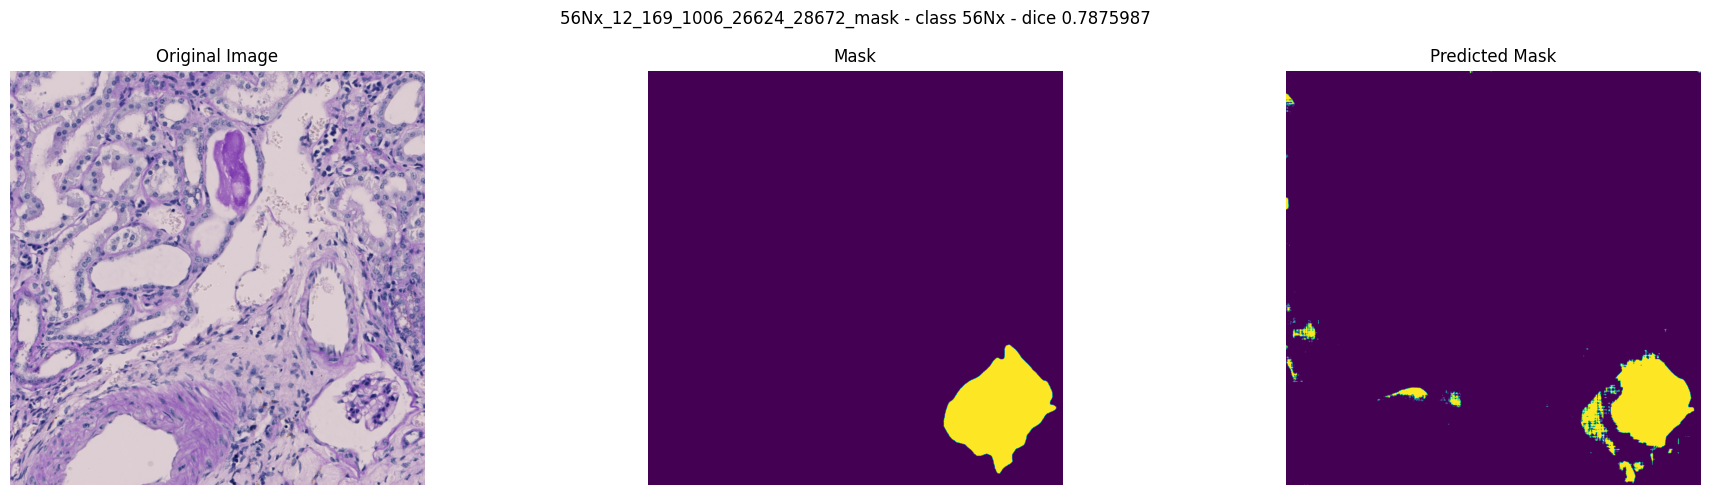

Copying the mask 56Nx_12_169_332_17408_9216_mask.jpg to the destination directory
Copying the mask /mnt/atlas/data_KPIs/data/Results_segmentation/Task1_patch_level/3foldCV/Unet/CropPosNeg/fold_0/validation/gaussian_windowing/noTTA/predicted_masks_fold0/56Nx_12_169_332_17408_9216_mask.jpg to the destination directory /mnt/atlas/data_KPIs/data/Results_segmentation/Task1_patch_level/3foldCV/Unet/CropPosNeg/fold_0/validation/gaussian_windowing/noTTA/predicted_masks_fold0_dice_thres0.1/56Nx_12_169_332_17408_9216_mask.jpg
Copying the mask 56Nx_12_169_333_18432_9216_mask.jpg to the destination directory
Copying the mask /mnt/atlas/data_KPIs/data/Results_segmentation/Task1_patch_level/3foldCV/Unet/CropPosNeg/fold_0/validation/gaussian_windowing/noTTA/predicted_masks_fold0/56Nx_12_169_333_18432_9216_mask.jpg to the destination directory /mnt/atlas/data_KPIs/data/Results_segmentation/Task1_patch_level/3foldCV/Unet/CropPosNeg/fold_0/validation/gaussian_windowing/noTTA/predicted_masks_fold0_dice_t

In [5]:
for index, row in df.iterrows():
    
    mask_path = [os.path.join(root, filename) for root, dirs, files in os.walk(datadir) for filename in files if filename.startswith(row['id_patch'])][0]
    image_path = mask_path.replace("mask", "img")
    pred_path = os.path.join(source_directory, row['id_patch'] + ".jpg")
    
    if index < 1: 
        original_image = Image.open(image_path)
        mask = Image.open(mask_path)
        predicted_mask = Image.open(pred_path)
        
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
        plt.suptitle(f"{row['id_patch']} - class {row['class']} - dice {row['dice']}")
        
        axs[0].imshow(original_image)
        axs[0].set_title("Original Image")
        axs[0].axis('off')

        axs[1].imshow(mask)
        axs[1].set_title("Mask")
        axs[1].axis('off')
        
        axs[2].imshow(np.swapaxes(predicted_mask,0,1))
        axs[2].set_title("Predicted Mask")
        axs[2].axis('off')
        
        # Superimpose the predicted mask on the original image
        # axs[3].imshow(original_image)
        # axs[3].imshow(np.swapaxes(predicted_mask,0,1)[:,:,2], alpha=0.5)
        # axs[3].set_title("Predicted Mask Superimposed")
        # axs[3].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    if row['dice'] < threshold: 
        print(f"Copying the mask {row['id_patch']}.jpg to the destination directory")
        source_mask_path = pred_path
        destination_mask_path = os.path.join(destination_directory, row['id_patch'] + ".jpg")
        shutil.copyfile(source_mask_path, destination_mask_path)
        print(f"Copying the mask {source_mask_path} to the destination directory {destination_mask_path}")
